# Feature Engineering with Linear Regression: Applied to the Ames Housing Data
Using the Ames Housing Data:

Dean De Cock Truman State University Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf

In this notebook, we will build some linear regression models to predict housing prices from this data. In particular, we will set out to improve on a baseline set of features via feature engineering: deriving new features from our existing data. Feature engineering often makes the difference between a weak model and a strong one.

We will use visual exploration, domain understanding, and intuition to construct new features that will be useful later in the course as we turn to prediction.

__Notebook Contents__

* Simple EDA
* One-hot Encoding variables
* Log transformation for skewed variables
* Pair plot for features
* Basic feature engineering: adding polynomial and interaction terms
* Feature engineering: categories and features derived from category aggregates

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
housing = pd.read_csv(r"C:\Jupyter Projects\Machine Learning\IBM\Data Prep & EDA\Ames_Housing_Data1.tsv",sep='\t')
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

In [7]:
#This is recommended by the dataset author to remove a few outliers
housing = housing.loc[housing['Gr Liv Area'] <= 4000, :]
print("No. of rows in the data: ",housing.shape[0])
print("No. of cols in the data: ",housing.shape[1])
housing_copy = housing.copy()

No. of rows in the data:  2926
No. of cols in the data:  82


We're going to first do some basic data cleaning on this data:

* Converting categorical variables to dummies
* Making skew variables symmetric

### One-hot encoding for dummy variables:

In [8]:
one_hot_encode_cols = housing.dtypes[housing.dtypes==object]
# one_hot_encode_cols
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
# one_hot_encode_cols
housing[one_hot_encode_cols].head(6).T #For improved readability

,0,1,2,3,4,5
MS Zoning,RL,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Norm,Feedr,Norm,Norm,Norm


In [9]:
#Do the one_hot Encoding
housing = pd.get_dummies(housing, columns=one_hot_encode_cols, drop_first=True)
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2926.0,1.464294e+03,8.467295e+02,1.0,7.312500e+02,1462.5,2.198750e+03,2.930000e+03
PID,2926.0,7.143288e+08,1.887272e+08,526301100.0,5.284770e+08,535453205.0,9.071801e+08,1.007100e+09
MS SubClass,2926.0,5.738380e+01,4.266706e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2436.0,6.905337e+01,2.275304e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2926.0,1.011099e+04,7.790972e+03,1300.0,7.438500e+03,9429.0,1.151875e+04,2.152450e+05
Overall Qual,2926.0,6.088175e+00,1.402714e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2926.0,5.563568e+00,1.112121e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2926.0,1.971299e+03,3.023803e+01,1872.0,1.954000e+03,1973.0,2.000750e+03,2.010000e+03
Year Remod/Add,2926.0,1.984226e+03,2.086302e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2903.0,1.007144e+02,1.760041e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


* __drop_first=False:__ Use when you need a complete representation of all categories, such as for non-linear models (e.g., decision trees, random forests) where multicollinearity is not an issue, or when you need to interpret the presence of every category explicitly.

* __drop_first=True:__ Use when preparing data for linear models (e.g., linear regression, logistic regression) to avoid multicollinearity and ensure that the design matrix is full rank.

### Log Transforming Skew Variables

In [10]:
mask = housing_copy.dtypes == float
float_cols = housing_copy.columns[mask]

skew_limit = 0.75 # Define a skew limit above which we will log transform
skew_vals = housing_copy[float_cols].skew()

In [11]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query("abs(Skew) > {}".format(skew_limit)))
skew_cols

,Skew
BsmtFin SF 2,4.136716
Bsmt Half Bath,3.966772
Mas Vnr Area,2.565828
Lot Frontage,1.113571
Bsmt Unf SF,0.925413
BsmtFin SF 1,0.821599


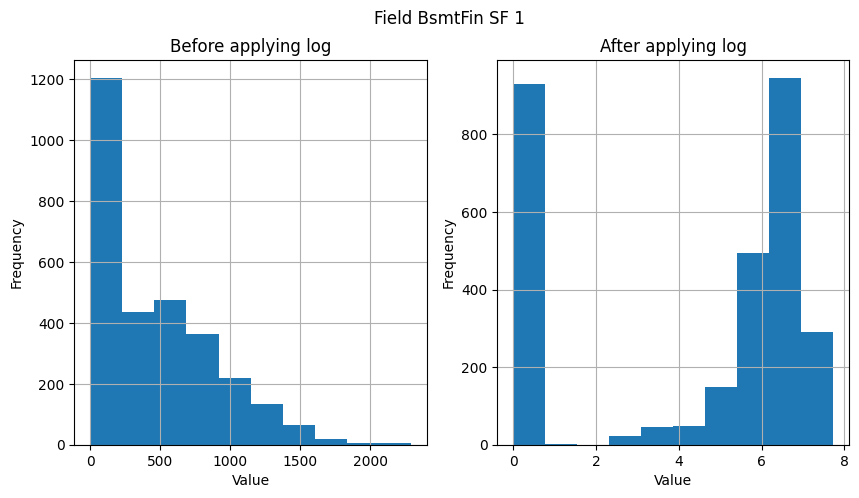

In [12]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

#choose a field
field = "BsmtFin SF 1"

#Creating two subplots and figure using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

#Creating ax_before plot
housing[field].hist(ax=ax_before)

#creating ax_after plot
housing[field].apply(np.log1p).hist(ax=ax_after)

ax_before.set(title='Before applying log', xlabel='Value', ylabel='Frequency')
ax_after.set(title='After applying log', xlabel='Value', ylabel='Frequency')
fig.suptitle('Field {}'.format(field))
plt.show()

In [13]:
#Apply the log transformation to each col
for col in skew_cols.index.values:
    if col == 'SalePrice':
        continue
    housing[col] = housing[col].apply(np.log1p)

In [14]:
#Now we have larger set of potentially useful features
housing.shape

(2926, 261)

In [15]:
# There are a *lot* of variables. Let's go back to our saved original data and look at how many values are missing for each variable. 
housing = housing_copy
housing.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Mas Vnr Type      1774
Fence             2355
Alley             2728
Misc Feature      2821
Pool QC           2915
Length: 82, dtype: int64

Let's pick out just a few numeric columns to illustrate basic feature transformations.

In [16]:
smaller_df= housing.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]

In [17]:
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2926.0,10110.988380,7790.971797,1300.0,7438.5,9429.0,11518.75,215245.0
Overall Qual,2926.0,6.088175,1.402714,1.0,5.0,6.0,7.00,10.0
Overall Cond,2926.0,5.563568,1.112121,1.0,5.0,5.0,6.00,9.0
Year Built,2926.0,1971.299043,30.238026,1872.0,1954.0,1973.0,2000.75,2010.0
Year Remod/Add,2926.0,1984.225906,20.863018,1950.0,1965.0,1993.0,2004.00,2010.0
Gr Liv Area,2926.0,1494.034176,486.199741,334.0,1126.0,1441.5,1740.00,3820.0
Full Bath,2926.0,1.564593,0.551390,0.0,1.0,2.0,2.00,4.0
Bedroom AbvGr,2926.0,2.853725,0.827600,0.0,2.0,3.0,3.00,8.0
Fireplaces,2926.0,0.597403,0.645759,0.0,0.0,1.0,1.00,4.0
Garage Cars,2925.0,1.765128,0.759717,0.0,1.0,2.0,2.00,5.0


In [18]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2930
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2926 non-null   int64  
 1   Overall Qual    2926 non-null   int64  
 2   Overall Cond    2926 non-null   int64  
 3   Year Built      2926 non-null   int64  
 4   Year Remod/Add  2926 non-null   int64  
 5   Gr Liv Area     2926 non-null   int64  
 6   Full Bath       2926 non-null   int64  
 7   Bedroom AbvGr   2926 non-null   int64  
 8   Fireplaces      2926 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2926 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.3 KB


There appears a one NA in Garage Cars. We will take a simple approach and fill it with 0

In [19]:
smaller_df = smaller_df.fillna(0)
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2930
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2926 non-null   int64  
 1   Overall Qual    2926 non-null   int64  
 2   Overall Cond    2926 non-null   int64  
 3   Year Built      2926 non-null   int64  
 4   Year Remod/Add  2926 non-null   int64  
 5   Gr Liv Area     2926 non-null   int64  
 6   Full Bath       2926 non-null   int64  
 7   Bedroom AbvGr   2926 non-null   int64  
 8   Fireplaces      2926 non-null   int64  
 9   Garage Cars     2926 non-null   float64
 10  SalePrice       2926 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.3 KB


# Pair plot of features
Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!

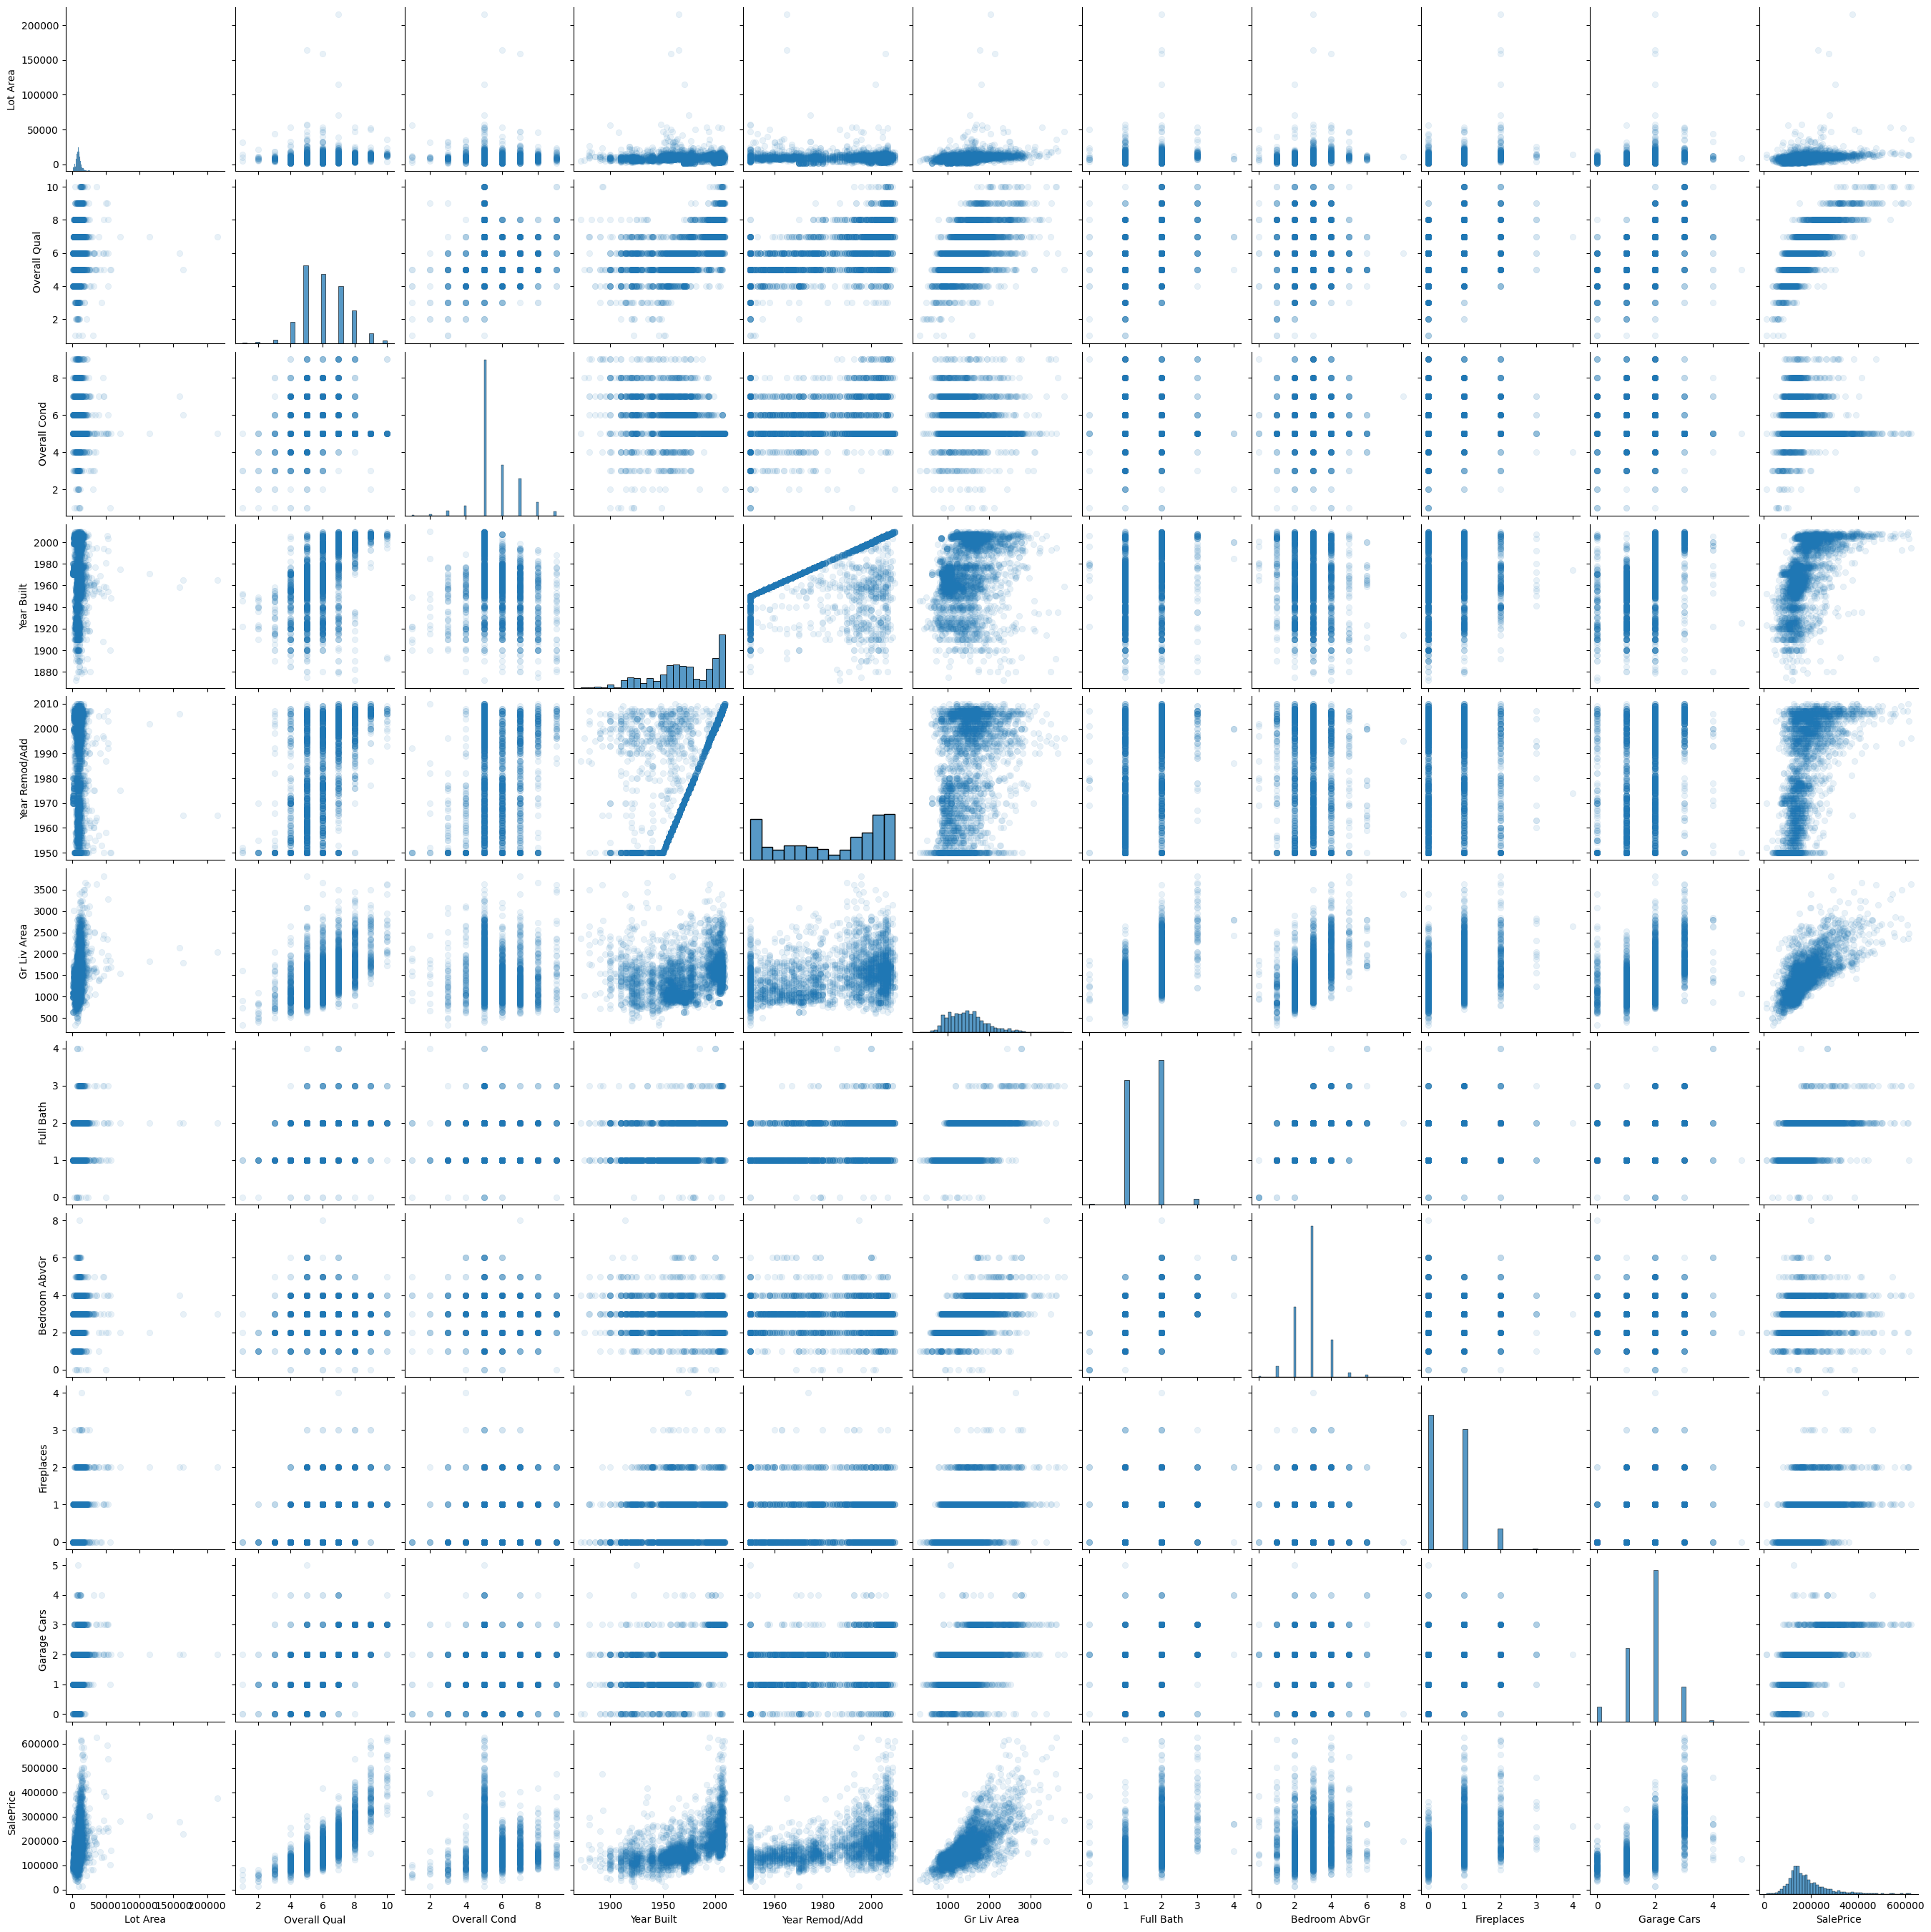

In [20]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor=None))

### Data Exploration Discussion:

1. What do these plots tell us about the distribution of the target?

2. What do these plots tell us about the relationship between the features and the target? Do you think that linear regression is well-suited to this problem? Do any feature transformations come to mind?

3. What do these plots tell us about the relationship between various pairs of features? Do you think there may be any problems here?

### Suppose our target variable is the SalePrice. We can set up separate variables for features and target.

In [21]:
X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]
Y = smaller_df['SalePrice']

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2930
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2926 non-null   int64  
 1   Overall Qual    2926 non-null   int64  
 2   Overall Cond    2926 non-null   int64  
 3   Year Built      2926 non-null   int64  
 4   Year Remod/Add  2926 non-null   int64  
 5   Gr Liv Area     2926 non-null   int64  
 6   Full Bath       2926 non-null   int64  
 7   Bedroom AbvGr   2926 non-null   int64  
 8   Fireplaces      2926 non-null   int64  
 9   Garage Cars     2926 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 251.5 KB


Now that we have feature/target data X, y ready to go, we're nearly ready to fit and evaluate a baseline model using our current feature set. We'll need to create a train/validation split before we fit and score the model.

Since we'll be repeatedly splitting X, y into the same train/val partitions and fitting/scoring new models as we update our feature set, we'll define a reusable function that completes all these steps, making our code/process more efficient going forward.

Great, let's go ahead and run this function on our baseline feature set and take some time to analyze the results.

### Basic feature engineering: adding polynomial and interaction terms
One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like 'Overall Qual' and 'Gr Liv Qual', we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic polynomial terms or transformations for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

As we add to our baseline set of features, we'll create a copy of the latest benchmark so that we can continue to store our older feature sets.

### Polynomial Features

In [23]:
X2 = X.copy()

X2['OQ2'] = X2['Overall Qual'] ** 2
X2['GLA2'] = X2['Gr Liv Area'] ** 2

As is, each feature is treated as an independent quantity. However, there may be interaction effects, in which the impact of one feature may dependent on the current value of a different feature.

For example, there may be a higher premium for increasing 'Overall Qual' for houses that were built more recently. If such a premium or a similar effect exists, a feature that multiplies 'Overall Qual' by 'Year Built' can help us capture it.

Another style of interaction term involves feature proprtions: for example, to get at something like quality per square foot we could divide 'Overall Qual' by 'Lot Area'.

Let's try adding both of these interaction terms and see how they impact the model results.

### Feature interactions

In [24]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']

## Categories and features derived from category aggregates

Incorporating categorical features into linear regression models is fairly straightforward: we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called __dummy variables__ or __one-hot-encoding__.

We'll first explore this using the 'House Style' feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.

In [26]:
housing['House Style'].value_counts()

House Style
1Story    1481
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

In [28]:
pd.get_dummies(housing['House Style'], drop_first=True).head().astype('int64')

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


We can call ```pd.get_dummies()``` on our entire dataset to quickly get data with all the original features and dummy variable representation of any categorical features. Let's look at some variable values.

In [32]:
nbh = housing['Neighborhood'].value_counts()
nbh

Neighborhood
NAmes      444
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

For this category, let's map the few least-represented neighborhoods to an "other" category before adding the feature to our feature set and running a new benchmark.

In [33]:
other_nbh = nbh[nbh <= 8].index.tolist()
other_nbh

['Greens', 'GrnHill', 'Landmrk']

In [34]:
X4 = X3.copy()
X4['Neighborhood'] = housing['Neighborhood'].replace(other_nbh, 'Other')

### Polynomial Features in Scikit-Learn
```sklearn``` allows you to build many higher-order terms at once with ```PolynomialFeatures```

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
pf = PolynomialFeatures(degree=2)

In [37]:
features = ['Lot Area','Overall Qual']
pf.fit(housing[features])

PolynomialFeatures()

In [40]:
pf.get_feature_names_out() #Must add input_features = features for appropriate names

array(['1', 'Lot Area', 'Overall Qual', 'Lot Area^2',
       'Lot Area Overall Qual', 'Overall Qual^2'], dtype=object)

In [41]:
feat_array = pf.transform(housing[features])
pd.DataFrame(feat_array, columns=pf.get_feature_names_out(input_features=features))

,1,Lot Area,Overall Qual,Lot Area^2,Lot Area Overall Qual,Overall Qual^2
0,1.0,31770.0,6.0,1.009333e+09,190620.0,36.0
1,1.0,31770.0,6.0,1.009333e+09,190620.0,36.0
2,1.0,11622.0,5.0,1.350709e+08,58110.0,25.0
3,1.0,14267.0,6.0,2.035473e+08,85602.0,36.0
4,1.0,11160.0,7.0,1.245456e+08,78120.0,49.0
...,...,...,...,...,...,...
2921,1.0,7937.0,6.0,6.299597e+07,47622.0,36.0
2922,1.0,8885.0,5.0,7.894322e+07,44425.0,25.0
2923,1.0,10441.0,5.0,1.090145e+08,52205.0,25.0
2924,1.0,10010.0,5.0,1.002001e+08,50050.0,25.0


### Recap
While we haven't yet turned to prediction, these feature engineering exercises set the stage. Generally, feature engineering often follows a sort of Pareto principle, where a large bulk of the predictive gains can be reached through adding a set of intuitive, strong features like polynomial transforms and interactions. Directly incorporating additional information like categorical variables can also be very helpful. Beyond this point, additional feature engineering can provide significant, but potentially diminishing returns. Whether it's worth it depends on the use case for the model.